# 모수 검정

* 검정 로드

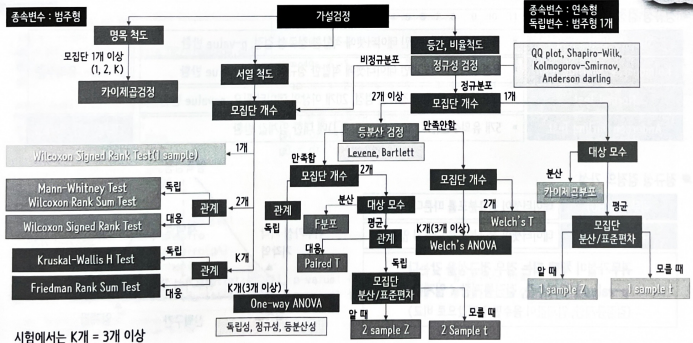

## 1.정규성 검정

* 정규성 검정(Nomality Test)
  * 데이터셋의 분포가 정규분포(Normal Distribution)을 따르는 지 검정하는 것
  * 모수 검정은 데이터의 정규분포를 가정하고 수행됨
  * 이 때문에 데이터 자체의 정규성을 확인하는 검정 과정이 필수
  * 중심극한정리에 의해 표본크기가 30보다 크면 표본평균의 분포는 모집단의 분포 모양과는 관계없이 정규분포에 가까워짐
  * 데이터 수가 30이 넘어도 데이터 특이성에 따라 정규분포를 따르지 않을 수 있음
    - 데이터의 정규분포를 확인하는 것이 좋음

* 중심극한정리(Central Limit Theorem)
  * 표본의 크기가 커질수록 표본평균의 분포는 모집단의 분포 모양과는 관계없이 정규분포에 가까워짐


## 2.정규성 검정의 종류,가설

* 정규성 검정의 종류
  * Shapiro-Wilks Test : 표본수가 5000미만인 데이터셋에 적합한 정규성 검정,p-value 반환
  * Kolmogorov-Smirnov Test : 표본수가 200초과인 데이터셋에 적합한 정규성 검정, p-value 반환
  * Normal Test : 왜도와 첨도를 통해 정규성 검정, 20개 이상의 데이터 필요, p-value 반환
  * Anderson Darling Test : 5개의 유의수준([15,10,5,2.5,1])에 대한 임계값 반환

* 정규성 검정의 가설
  * 귀무가설(H0) : 데이터셋이 정규분포를 따른다
  * 대립가설(H1) : 데이터셋이 정규분포를 따르지 않는다

  * 귀무가설이 채택되는 경우 정규성을 갖는다
    - p-value > 유의수준, 검정통계량 < 임계값 (검정통계량,임계값이 음수면 절대값으로 비교)

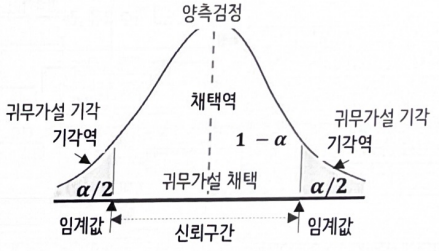



## 3.정규성 검정을 위한 함수



* 정규성 검정을 위한 객체 함수
  * 객체 생성 함수 import
    - from scipy.stats import shapiro,kstest,normaltest,anderson
  * Shapio Wilks
    - shapiro(X) -> statistic,p-value
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
  * Kolmogorov-Smirnov Test
    - kstest(x,"norm")
    - kstest(x,stats.norm.cdf) -> statistic,p-value
    - alternative = 'two-sided' {'two-sided','less','greater'}
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

  * Normal Test
    - normaltest(x) -> statistic,p-value
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
  * Anderson Darling Test
    - anderson(x,dist="norm") -> statistic,critical_values,significane_level
    - dist = { 'norm', 'expon', 'logistic', 'gumbel', 'gumbel_l', 'gumbel_r', 'extreme1' }
    - dist에 따라 반환되는 유의수준이 다름


## 4.정규성 검정의 예 1(shapiro)

In [164]:
import pandas as pd
import numpy as np
# 데이터 생성
data = {
    "stime20s": [4, 4, 5, 5, 6, 6, 7, 3, 8, 7, 8, 8, 7, 7, 7, 6, 8, 5, 6, 6],
    "stime40s": [5, 5, 6, 7, 6, 7, 7, 5, 5, 6, 8, 7, 6, 6, 8, 7, 7, 6, 5, 8],
    "ID": range(1, 21)
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 데이터프레임 출력
display(df.T)
print(df.info())

# 그룹을 나누어 저장함
gA = df['stime20s']
gB = df['stime40s']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
stime20s,4,4,5,5,6,6,7,3,8,7,8,8,7,7,7,6,8,5,6,6
stime40s,5,5,6,7,6,7,7,5,5,6,8,7,6,6,8,7,7,6,5,8
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   stime20s  20 non-null     int64
 1   stime40s  20 non-null     int64
 2   ID        20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes
None


In [165]:
# 정규성 검정 - 1 shapiro wiks test
from scipy.stats import shapiro
A_statistic,A_pvalue = shapiro(gA)
B_statistic,B_pvalue = shapiro(gB)
print(f'그룹 A : 검정통계량 : {A_statistic:.4f},  p-value : {A_pvalue:.4f}')
print(f'그룹 B : 검정통계량 : {B_statistic:.4f},  p-value : {B_pvalue:.4f}')

그룹 A : 검정통계량 : 0.9239,  p-value : 0.1180
그룹 B : 검정통계량 : 0.8810,  p-value : 0.0184


## 5.정규성 검정의 예 (kstest)


In [166]:
# 정규성 검정 - 2 kstest(kolmogorov-smirnov test)
from scipy.stats import kstest
# 두 개의 데이터가 같은 분포인지 아닌지 검정
# 귀무가설 : 두집단의 분포가 같다
# 대립가설 : 두집단의 분포가 다르다
A_statistic , A_pvalue = kstest(gA,"norm")
B_statistic , B_pvalue = kstest(gB,"norm")
print(f'그룹 A : 검정통계량 : {A_statistic:.4f} , p-value : {A_pvalue:.4f}')
print(f'그룹 B : 검정통계량 : {B_statistic:.4f} , p-value : {B_pvalue:.4f}')

그룹 A : 검정통계량 : 0.9987 , p-value : 0.0000
그룹 B : 검정통계량 : 1.0000 , p-value : 0.0000


## 6.정규성 검정의 예 (normaltest)

In [167]:
# 정규성 검정 - 3 normaltest(20개 이상의 데이터 필요)
from scipy.stats import normaltest
A_statistic,A_pvalue = normaltest(gA)
B_statistic,B_pvalue = normaltest(gB)
print(f'그룹 A : 검정통계량 : {A_statistic:.4f}, p-value{A_pvalue:.4f}')
print(f'그룹 B : 검정통게량 : {B_statistic:.4f}. p-value{B_pvalue:.4f}')

그룹 A : 검정통계량 : 1.1732, p-value0.5562
그룹 B : 검정통게량 : 2.0450. p-value0.3597


## 7.정규성 검정의 예 (anderson)


In [168]:
# 정규성 검정 -4 anderson darling test
# 검정통게량 < 임계값, 정규성이 보장된다고 할 수 있다
from scipy.stats import anderson
rA = anderson(gA)  # statistic, critical_values,significane_level
rB = anderson(gB)

print('그룹A:', *rA) #0.56 < 0.57 유의수준 : 10%, 5%, 2.5%, 1%
print('그룹B:', *rB) #0.89 < 0.96 유의수준 : 1%

그룹A: 0.5601097602856164 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]
그룹B: 0.8918678522034931 [0.506 0.577 0.692 0.807 0.96 ] [15.  10.   5.   2.5  1. ]
